In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('white')
sns.set_context("notebook", font_scale=1.5)

In [2]:
!unzip features.zip

Archive:  features.zip
  inflating: deepseek-r1_Cornell_features.csv  
  inflating: phi4_AmItheAsshole_features.csv  
  inflating: dolphin_AmItheAsshole_features.csv  
  inflating: human_Cornell_features.csv  
  inflating: llama3-2_Cornell_features.csv  
  inflating: human_AmItheAsshole_features.csv  


In [3]:
N_SAMPLES = 10000

In [73]:
humans_Cornell_df = pd.read_csv("./human_Cornell_features.csv")
llama_Cornell_df = pd.read_csv("./llama3-2_Cornell_features.csv")
deepseekr1_Cornell_df = pd.read_csv('./deepseek-r1_Cornell_features.csv')

humans_AITA_df = pd.read_csv('./human_AmItheAsshole_features.csv')
dolphin_AITA_df = pd.read_csv('./dolphin_AmItheAsshole_features.csv')
phi4_AITA_df = pd.read_csv('./phi4_AmItheAsshole_features.csv')


In [74]:
len(humans_Cornell_df)

72984

In [13]:
dolphin_AITA_df.columns

Index(['utterance_id', 'num_sentences', 'avg_sentence_length',
       'std_sentence_length', 'max_sentence_length', 'min_sentence_length',
       'num_tokens', 'avg_word_length', 'std_word_length', 'type_token_ratio',
       'lemma_diversity', 'hapax_legomenon_density', 'noun_ratio',
       'verb_ratio', 'adj_ratio', 'adv_ratio', 'pron_ratio',
       'avg_dependency_depth', 'max_dependency_depth', 'num_entities',
       'entity_density', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'punctuation_density', 'comma_density'],
      dtype='object')

In [ ]:
# 'human-AITA': '#000000',       # Black
#     'human-Cornell': '#808080',    # Grey
#     'dolphin-AITA': '#1A1ADA',     # Blue
#     'phi4-AITA': '#8B4513',        # Brown
#     'llama3-Cornell': '#FFD700',   # Yellow
#     'deepseek-Cornell': '#FF69B4'  # Pink

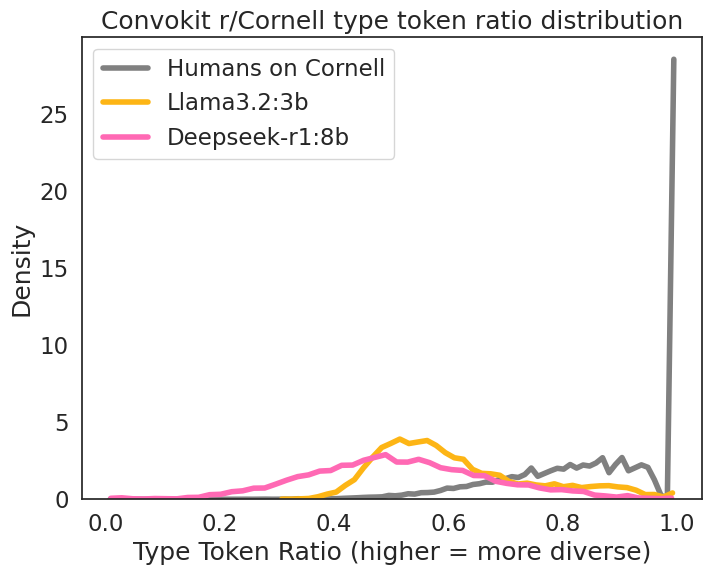

In [36]:
fig = plt.figure(figsize=(8,  6))
sns.histplot(humans_Cornell_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Humans on Cornell", color='#808080')
sns.histplot(llama_Cornell_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Llama3.2:3b", color='#FDB515')
sns.histplot(deepseekr1_Cornell_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Deepseek-r1:8b", color='#FF69B4')
plt.legend()
plt.xlabel('Type Token Ratio (higher = more diverse)')
plt.title('Convokit r/Cornell type token ratio distribution')
plt.show()

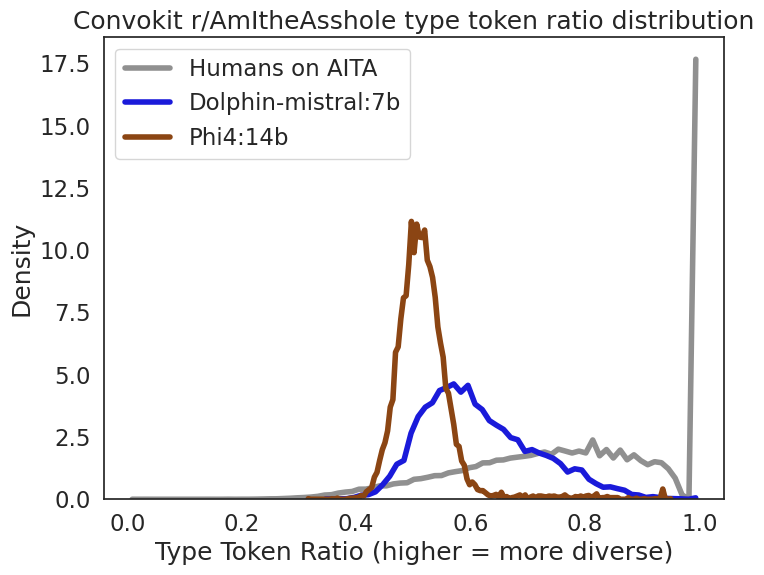

In [37]:
fig = plt.figure(figsize=(8,  6))
sns.histplot(humans_AITA_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Humans on AITA", color='#909090')
sns.histplot(dolphin_AITA_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Dolphin-mistral:7b", color='#1A1ADA')
sns.histplot(phi4_AITA_df['type_token_ratio'], fill=False, stat='density', element='poly', linewidth=4, label="Phi4:14b", color='#8B4513')
plt.legend()
plt.xlabel('Type Token Ratio (higher = more diverse)')
plt.title('Convokit r/AmItheAsshole type token ratio distribution')
plt.show()

## Hapax Legomenon

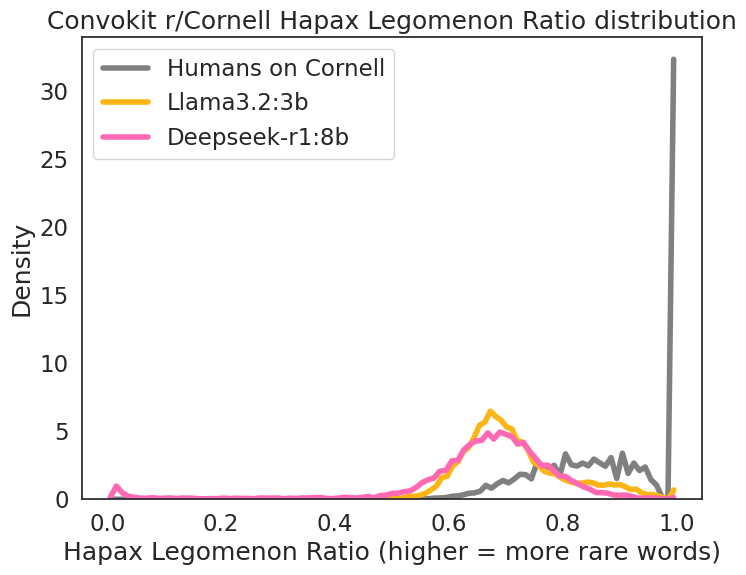

In [38]:
fig = plt.figure(figsize=(8,  6))
sns.histplot(humans_Cornell_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Humans on Cornell", color='#808080')
sns.histplot(llama_Cornell_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Llama3.2:3b", color='#FDB515')
sns.histplot(deepseekr1_Cornell_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Deepseek-r1:8b", color='#FF69B4')
plt.legend()
plt.xlabel('Hapax Legomenon Ratio (higher = more rare words)')
plt.title('Convokit r/Cornell Hapax Legomenon Ratio distribution')
plt.show()

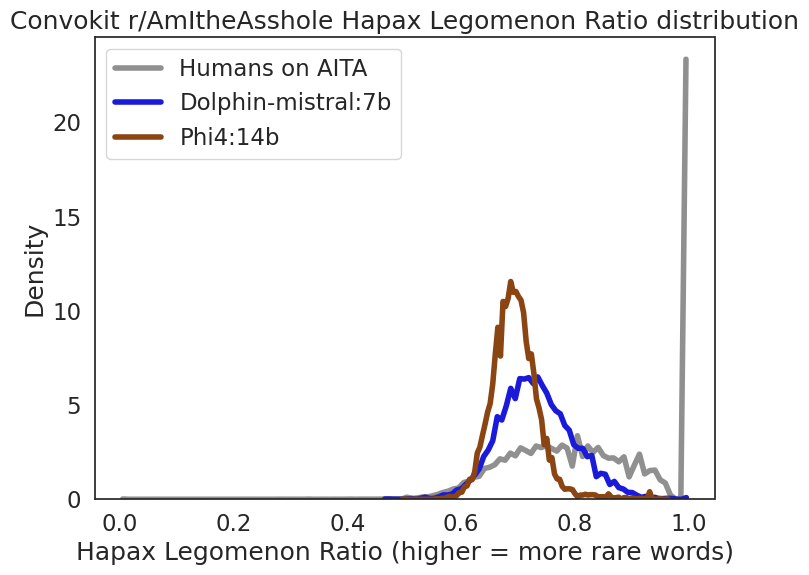

In [39]:
fig = plt.figure(figsize=(8,  6))
sns.histplot(humans_AITA_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Humans on AITA", color='#909090')
sns.histplot(dolphin_AITA_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Dolphin-mistral:7b", color='#1A1ADA')
sns.histplot(phi4_AITA_df['hapax_legomenon_density'], fill=False, stat='density', element='poly', linewidth=4, label="Phi4:14b", color='#8B4513')
plt.legend()
plt.xlabel('Hapax Legomenon Ratio (higher = more rare words)')
plt.title('Convokit r/AmItheAsshole Hapax Legomenon Ratio distribution')
plt.show()

## Parts of Speech

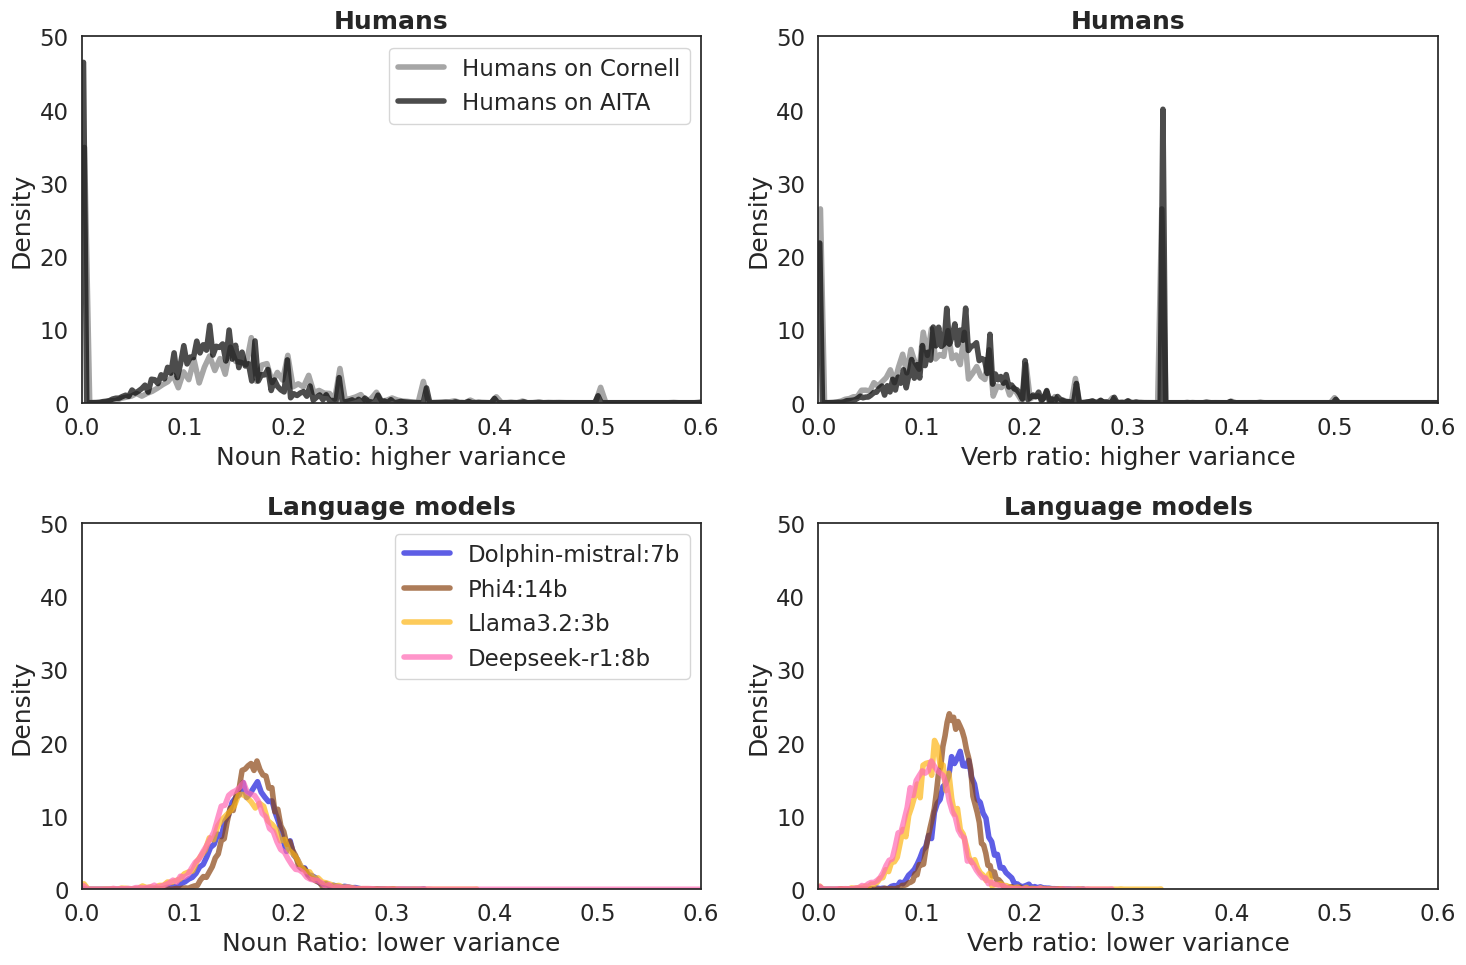

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(humans_Cornell_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on Cornell", color='#808080', ax=axes[0,0])
sns.histplot(humans_AITA_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on AITA", color='#000000', ax=axes[0,0])
axes[0, 0].set_title('Humans', fontweight='bold')
axes[0, 0].set_xlabel('Noun Ratio: higher variance')
axes[0, 0].set_xlim(0, 0.6)
axes[0, 0].set_ylim(0, 50)

sns.histplot(dolphin_AITA_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Dolphin-mistral:7b", color='#1A1ADA', ax=axes[1,0])
sns.histplot(phi4_AITA_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Phi4:14b", color='#8B4513', ax=axes[1,0])
sns.histplot(llama_Cornell_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Llama3.2:3b", color='#FDB515', ax=axes[1,0])
sns.histplot(deepseekr1_Cornell_df['noun_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Deepseek-r1:8b", color='#FF69B4', ax=axes[1,0])
axes[1, 0].set_title('Language models', fontweight='bold')
axes[1, 0].set_xlabel('Noun Ratio: lower variance')
axes[1, 0].set_xlim(0, 0.6)
axes[1, 0].set_ylim(0, 50)

sns.histplot(humans_Cornell_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on Cornell", color='#808080', ax=axes[0,1])
sns.histplot(humans_AITA_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on AITA", color='#000000', ax=axes[0,1])
axes[0, 1].set_title('Humans', fontweight='bold')
axes[0, 1].set_xlabel('Verb ratio: higher variance')
axes[0, 1].set_xlim(0, 0.6)
axes[0, 1].set_ylim(0, 50)

sns.histplot(dolphin_AITA_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Dolphin-mistral:7b", color='#1A1ADA', ax=axes[1,1])
sns.histplot(phi4_AITA_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Phi4:14b", color='#8B4513', ax=axes[1,1])
sns.histplot(llama_Cornell_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Llama3.2:3b", color='#FDB515', ax=axes[1,1])
sns.histplot(deepseekr1_Cornell_df['verb_ratio'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Deepseek-r1:8b", color='#FF69B4', ax=axes[1,1])
axes[1, 1].set_title('Language models', fontweight='bold')
axes[1, 1].set_xlabel('Verb ratio: lower variance')
axes[1, 1].set_xlim(0, 0.6)
axes[1, 1].set_ylim(0, 50)

axes[0, 0].legend()
axes[1, 0].legend()

plt.tight_layout()
plt.show()

## Reading Grade Analysis

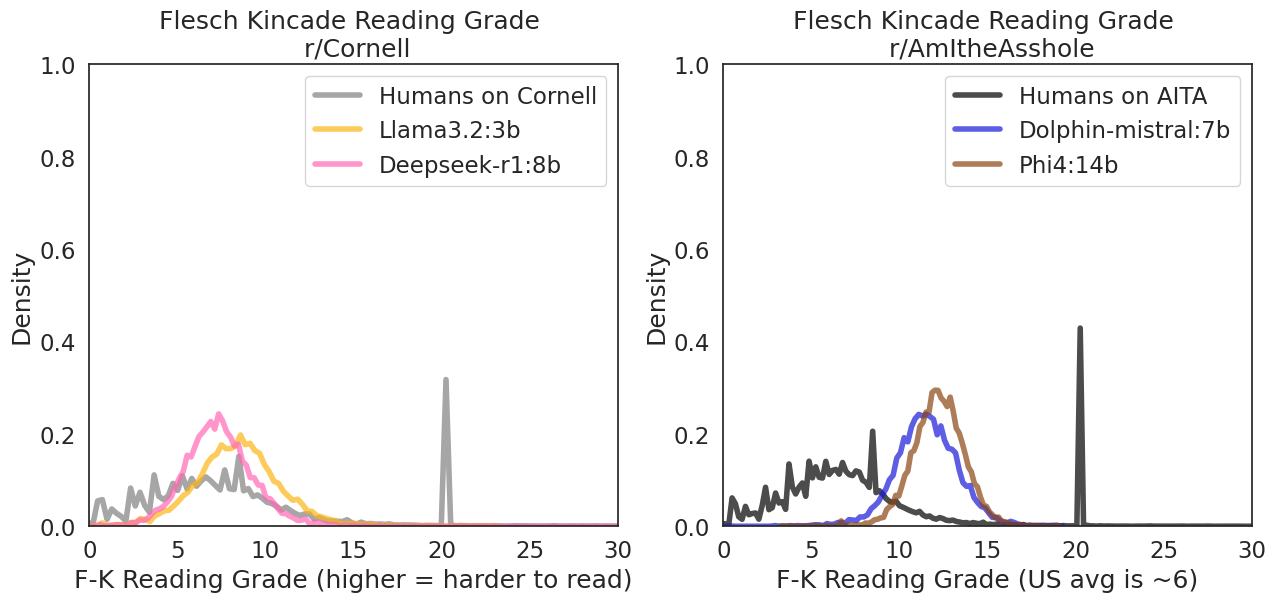

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(humans_Cornell_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on Cornell", color='#808080', ax=axes[0])
sns.histplot(llama_Cornell_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Llama3.2:3b", color='#FDB515', ax=axes[0])
sns.histplot(deepseekr1_Cornell_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Deepseek-r1:8b", color='#FF69B4', ax=axes[0])
axes[0].set_title('Flesch Kincade Reading Grade \n r/Cornell')
axes[0].set_xlabel('F-K Reading Grade (higher = harder to read)')
axes[0].set_xlim(0, 30)
axes[0].set_ylim(0, 1)


sns.histplot(humans_AITA_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on AITA", color='#000000', ax=axes[1])
sns.histplot(dolphin_AITA_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Dolphin-mistral:7b", color='#1A1ADA', ax=axes[1])
sns.histplot(phi4_AITA_df['flesch_kincaid_grade'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Phi4:14b", color='#8B4513', ax=axes[1])
axes[1].set_title('Flesch Kincade Reading Grade \n r/AmItheAsshole')
axes[1].set_xlabel('F-K Reading Grade (US avg is ~6)')
axes[1].set_xlim(0, 30)
axes[1].set_ylim(0, 1)

axes[0].legend()
axes[1].legend()
# plt.title('Flesch Kincade Reading Grade', fontweight='bold')
plt.show()

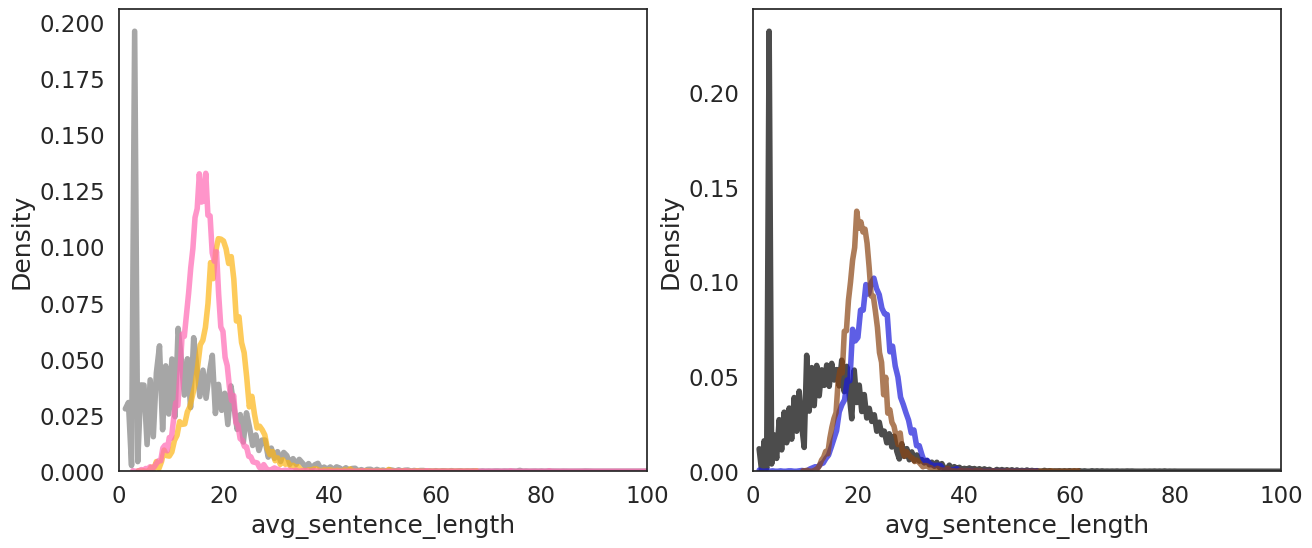

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(humans_Cornell_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on Cornell", color='#808080', ax=axes[0])
sns.histplot(llama_Cornell_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Llama3.2:3b", color='#FDB515', ax=axes[0])
sns.histplot(deepseekr1_Cornell_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Deepseek-r1:8b", color='#FF69B4', ax=axes[0])
# axes[0].set_title('Flesch Kincade Reading Grade \n r/Cornell')
# axes[0].set_xlabel('F-K Reading Grade (higher = harder to read)')
axes[0].set_xlim(0, 100)
# axes[0].set_ylim(0, 1)


sns.histplot(humans_AITA_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Humans on AITA", color='#000000', ax=axes[1])
sns.histplot(dolphin_AITA_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Dolphin-mistral:7b", color='#1A1ADA', ax=axes[1])
sns.histplot(phi4_AITA_df['avg_sentence_length'], fill=False, stat='density', element='poly', linewidth=4, alpha=0.7, label="Phi4:14b", color='#8B4513', ax=axes[1])
# axes[1].set_title('Flesch Kincade Reading Grade \n r/AmItheAsshole')
# axes[1].set_xlabel('F-K Reading Grade (US avg is ~6)')
axes[1].set_xlim(0, 100)
# axes[1].set_ylim(0, 1)

# axes[0].legend()
# axes[1].legend()
# plt.title('Flesch Kincade Reading Grade', fontweight='bold')
plt.show()